# Permutation Tests
Also referred to as randomization, permutation tests are a type of resampling wherein the distribution of the test statistic under the null hypothesis, $H_0$, is obtained by computing the test statistic for all possible permutations of data points and labels. Of course, in practice the distribution is estimated by sampling random permutations for scalability. Why do we need to know the distribution of the test statistic? 

To answer this question, we must first define the meaning of a p-value. A popular misconception about the p-value is that it is a probability for how likely it is that either $H_0$ or $H_A$ is true; however, it actually describes how likely it is to observe a test statistic _at least_ as extreme as the observed test statistic on a given distribution. When the p-value is very small, we reject $H_0$ and deem the observed data to be *significant*. Typically, $p<0.05$ is considered to be small.


As an example, we might want to test whether the data for groups A and B come from the same underlying distribution or not. For each group, the observed means are $\mu_A$ and $\mu_B$, respectively. We can define the null hypothesis that the data come from the same distribution as: 

$$H_0:\mu_A-\mu_B=0$$

and the alternative hypothesis that the data do not come from thes ame distribution as: 

$$H_A:\mu_A-\mu_B\neq0$$

The test statistic for the observed data can be described as $T_{obs}=\mu_A-\mu_B$. However, because we have no idea what the underlying distribution for this test statistic looks like, we have no way of computing the p-value for this observation! We also have no more observations for this data, so how can we estimate the sampling distribution? In the absence of additional observations, we will randomly relabel the observed data points (i.e. membership in group A vs. B), recompute new test statistics $T_i$ for each permutation $i\in(1,...,n)$ for $n$ permutations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Example: Efficacy of a new drug treatment
Let's say a new drug has been developed to treat disease X and is in clinical trials. We want to determine the efficacy of this drug based on patient survival outcomes. We have the survival times, measured in days after diagnosis, for a group of patients that received the drug and another group of patients that did not receive the drug. Here, we will test the null hypothesis is that the drug treatment does not prolong survival time from the point of diagnoses, or:
$$H_0:\mu_{treated}-\mu_{untreated}=0$$
The alternative hypothesis states that the drug treatment results in a statistically significant increase in the post-diagnosis survival time:
$$H_A:\mu_{treated}-\mu_{untreated}\geq0$$

We will start by loading the post-diagnosis survival times, in days, for patients in the untreated and treated groups.

### Load data

In [2]:
untreated = np.asarray([int(x) for x in open('./untreated_survival_times.txt').read().split(',')])
treated = np.asarray([int(x) for x in open('./treated_survival_times.txt').read().split(',')])

How many patients are in each group?

In [3]:
print('%d patients in untreated group' % untreated.shape[0])
print('%d patients in treated group' % treated.shape[0])

50 patients in untreated group
44 patients in treated group


Let's visualize the distribution of survival times for each of these groups.

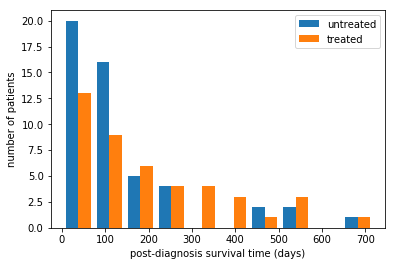

In [4]:
plt.hist((untreated, treated))
plt.legend(['untreated', 'treated'])
plt.xlabel('post-diagnosis survival time (days)')
plt.ylabel('number of patients')
plt.show()

### Compute the test statistic $T_{obs}$
$$T_{obs} = \mu_{treated}-\mu_{untreated}$$

In [5]:
tObs = treated.mean() - untreated.mean()
print('t_Obs = %.3g' % tObs)

t_Obs = 61


### Permutation test
In order to estimate the distribution of the test statistic $T_{obs}$, we will shuffle the data points and randomly relabel them (treated/untreated) $N$ times ($N$ permutations) and recompute the test statistic $T_i = \mu_{treated}-\mu_{untreated}$ for $i\in\{1,...,N\}$. For this example, we will run 1000 permutations ($N=1000$).

In [6]:
N = 1000
testStats = []

pooled_data = np.hstack([treated, untreated])
sizeTreated = np.shape(treated)[0]
sizeUntreated = np.shape(untreated)[0]

for i in range(N):
    np.random.shuffle(pooled_data)
    permTreated = pooled_data[:sizeTreated]
    permUntreated = pooled_data[-sizeUntreated:]
    ti = permTreated.mean() - permUntreated.mean()
    testStats.append(ti)
    print('permutation %d: t_i = %.3g' % (i+1, ti))

permutation 1: t_i = -4.26
permutation 2: t_i = 7.4
permutation 3: t_i = -45.5
permutation 4: t_i = -3.07
permutation 5: t_i = -32.8
permutation 6: t_i = 9.54
permutation 7: t_i = -9.01
permutation 8: t_i = 8.51
permutation 9: t_i = 20.6
permutation 10: t_i = 75.8
permutation 11: t_i = 74.4
permutation 12: t_i = 2.06
permutation 13: t_i = 65.8
permutation 14: t_i = -13.8
permutation 15: t_i = 22.7
permutation 16: t_i = -48.8
permutation 17: t_i = -1.79
permutation 18: t_i = 27.3
permutation 19: t_i = -55.2
permutation 20: t_i = 88.6
permutation 21: t_i = -41.7
permutation 22: t_i = 14.9
permutation 23: t_i = -20.8
permutation 24: t_i = -7.26
permutation 25: t_i = -32.7
permutation 26: t_i = -40.1
permutation 27: t_i = 40.3
permutation 28: t_i = 12.1
permutation 29: t_i = 5.69
permutation 30: t_i = 31.1
permutation 31: t_i = 1.67
permutation 32: t_i = -13.5
permutation 33: t_i = -33.2
permutation 34: t_i = 21.2
permutation 35: t_i = -6.96
permutation 36: t_i = -23.2
permutation 37: t_i 

Let's take a look at that distribution:

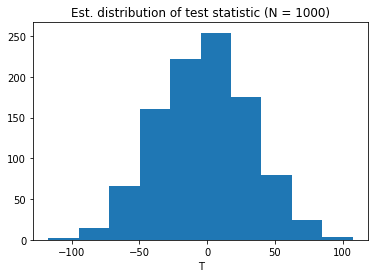

In [7]:
plt.hist(testStats)
plt.title('Est. distribution of test statistic (N = %d)' % N)
plt.xlabel('T')
plt.show()

### Compute p-value
Now that you have generated 1000 estimates of the test statistic with permuted data labels, you can compute the p-value for $T_{obs}$. As a reminder, the p-value is a measure of how likely it is to get a test statistic _at least_ as extreme as what you observed. Thus, $p$ can be computed as:

$$ p = \frac{\text{# of permutations where } T_i \geq T_{obs}}{\text{total # of permutations}} $$

Visually, that would look like the probability that you would observe a test statistic that falls to the right of the red line.

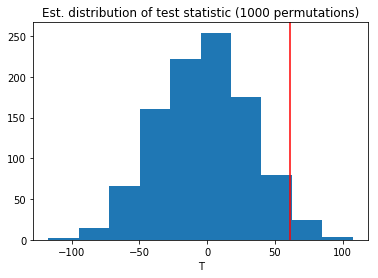

In [8]:
plt.hist(testStats)
plt.title('Est. distribution of test statistic (%d permutations)' % N)
plt.xlabel('T')
plt.axvline(tObs, color = 'r')
plt.show()

In [9]:
p = sum(testStats>=tObs)/N
print('p = %.3g' % p)

p = 0.035


### Conclusion
A significance threshold at $\alpha=0.05$ is popularly used for most statistical analyses. When $p<0.05$, this means that there is a less than 5% chance that you would observe a test statistic at least as extreme as $T_{obs}$ under the null distribution. In this case, how should we interpret the results?

# Bootstrapping

Let's say we want to know the true difference in the mean survival post-diagnosis between treated and untreated patients. Given the same data used above, we can use bootstrapping - or sampling with replacement - to estimate a confidence interval between which this true mean lies.

To do this, we will sample from each group with replacement and compute the difference in the means of the resampled groups. Each resampled group should be the same size as the original group. We will repeat this process $N = 1000$ times (as above).

In [10]:
mean_differences = []

for i in range(N):
    sample_untreated = np.random.choice(untreated, size = untreated.shape)
    sample_treated = np.random.choice(treated, size = treated.shape)
    
    bootstrap_diff = np.mean(sample_treated) - np.mean(sample_untreated)
    mean_differences.append(bootstrap_diff)

### Get confidence interval - 95%

To do this, we will set the bounds of the CI at the 2.5th percentile and 97.5th percentile. 

In [11]:
ci = np.quantile(mean_differences, [0.025, 0.975])
print('95%% CI bounds: [%.5f, %.5f]' % (ci[0], ci[1]))

95% CI bounds: [-6.68900, 126.96430]


### Visualize the bounds of the CI

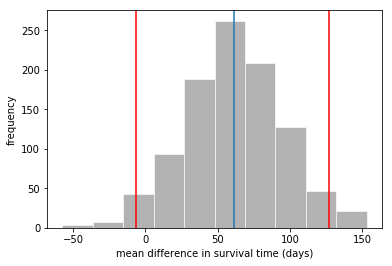

In [12]:
plt.hist(mean_differences, color = 'grey', alpha = 0.6, edgecolor = 'white')
plt.axvline(ci[0], color = 'red')
plt.axvline(ci[1], color = 'red')
plt.axvline(tObs)
plt.xlabel('mean difference in survival time (days)')
plt.ylabel('frequency')
plt.show()